In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import lxml
import re
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
import matplotlib.pyplot as plt
import string
import collections


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import seaborn as sns

In [3]:
%load_ext kedro.extras.extensions.ipython

[08/27/22 22:57:30] INFO     Updated path to Kedro project: C:\Users\wvanbuskir002\Documents\7 -      ]8;id=571603;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=567656;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#53\53]8;;\
                             Other Research - Tech\Kedro\last-statements                                           

[08/27/22 22:57:36] INFO     Kedro project Last Statements                                            ]8;id=315295;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=746386;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=402087;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=414697;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#80\80]8;;\

In [4]:
%reload_kedro

                    INFO     No path argument was provided. Using: C:\Users\wvanbuskir002\Documents\7 ]8;id=41811;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=32894;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             - Other Research - Tech\Kedro\last-statements                                         

[08/27/22 22:57:37] INFO     Kedro project Last Statements                                            ]8;id=845234;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=342003;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=613407;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=426963;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#80\80]8;;\

# Exploratory Data Analysis

In [5]:
# transformed_last_statement
# name_lookup_table

df_tfidf = catalog.load("transformed_last_statement")
df_names = catalog.load("name_lookup_table")
df_statements = catalog.load("processed_last_statements")

                    INFO     Loading data from 'transformed_last_statement' (CSVDataSet)...     ]8;id=787834;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=564283;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

                    INFO     Loading data from 'name_lookup_table' (CSVDataSet)...              ]8;id=17669;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=795549;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

                    INFO     Loading data from 'processed_last_statements' (CSVDataSet)...      ]8;id=17573;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=400541;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

,0,1,2,3,4,5,6,7,8,9,...,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,...,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.005411,0.000620,0.000186,0.000137,0.002639,0.000381,0.000569,0.002963,0.000952,0.001511,...,0.000531,0.009401,0.000332,0.001077,0.008538,0.001245,0.001023,0.001165,0.001478,0.000519
std,0.027768,0.012733,0.003812,0.002822,0.020935,0.007819,0.011697,0.026953,0.014134,0.019099,...,0.010900,0.068754,0.006816,0.019871,0.060412,0.025585,0.021010,0.016914,0.021441,0.010667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.268842,0.261571,0.078305,0.057977,0.205159,0.160630,0.240294,0.335907,0.244492,0.273937,...,0.223917,0.802783,0.140021,0.405381,0.558859,0.525593,0.431606,0.251884,0.314874,0.219118


## Try Clustering

In [61]:
modelkmeans = KMeans(n_clusters=7, init='k-means++', n_init=100)
clusters = modelkmeans.fit_predict(df_tfidf)

In [62]:
clusters

array([4, 5, 2, 3, 5, 2, 4, 3, 3, 5, 3, 5, 2, 3, 5, 1, 1, 2, 1, 5, 5, 4,
       2, 1, 5, 3, 5, 5, 3, 4, 6, 5, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 3, 1,
       3, 4, 3, 5, 3, 6, 3, 6, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 5, 6, 5, 6,
       4, 5, 5, 5, 5, 6, 6, 1, 0, 3, 6, 3, 6, 6, 6, 6, 1, 5, 3, 1, 1, 2,
       5, 5, 1, 3, 3, 3, 1, 3, 4, 2, 2, 2, 5, 4, 3, 3, 3, 3, 5, 3, 3, 3,
       5, 1, 1, 6, 3, 1, 6, 6, 3, 1, 3, 5, 2, 1, 3, 3, 3, 5, 2, 3, 6, 1,
       4, 3, 1, 4, 6, 3, 3, 1, 3, 3, 3, 6, 1, 3, 1, 3, 3, 4, 3, 1, 3, 6,
       1, 5, 6, 3, 3, 5, 1, 5, 6, 1, 3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3,
       3, 1, 3, 3, 5, 3, 3, 4, 3, 3, 4, 3, 1, 3, 3, 4, 3, 4, 3, 3, 5, 3,
       1, 1, 4, 3, 5, 3, 3, 3, 3, 4, 1, 3, 3, 3, 1, 2, 5, 3, 5, 3, 3, 4,
       4, 3, 4, 3, 5, 3, 6, 1, 5, 3, 4, 4, 3, 3, 3, 3, 4, 5, 5, 5, 1, 1,
       1, 1, 4, 3, 3, 3, 3, 5, 1, 3, 5, 3, 6, 1, 6, 3, 5, 5, 5, 3, 3, 6,
       3, 3, 3, 5, 3, 1, 1, 5, 1, 3, 3, 1, 4, 6, 1, 6, 3, 6, 1, 3, 6, 3,
       5, 6, 3, 6, 1, 6, 6, 5, 5, 6, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 6, 3,
       5, 5, 3, 1, 3, 3, 4, 3, 5, 1, 3, 1, 5, 5, 1, 5, 5, 1, 1, 3, 3, 1,
       1, 1, 5, 3, 1, 5, 5, 3, 5, 4, 4, 5, 4, 1, 3, 4, 1, 3, 4, 1, 1, 5,
       4, 5, 3, 3, 4, 1, 4, 4, 5, 4, 1, 3, 1, 5, 3, 5, 1, 5, 4, 3, 4, 1,
       5, 1, 1, 5, 5, 6, 5, 5, 5, 3, 1, 1, 1, 5, 3, 5, 1, 3, 5, 1, 5, 1,
       5, 1, 5, 1, 1, 5, 4, 5, 5, 1, 5, 1, 5, 5, 3, 3, 1, 1, 5, 5, 5, 1,
       1, 1, 5, 5])

In [63]:
clusters.shape

(422,)

In [64]:
modelkmeans.labels_

array([4, 5, 2, 3, 5, 2, 4, 3, 3, 5, 3, 5, 2, 3, 5, 1, 1, 2, 1, 5, 5, 4,
       2, 1, 5, 3, 5, 5, 3, 4, 6, 5, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 3, 1,
       3, 4, 3, 5, 3, 6, 3, 6, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 5, 6, 5, 6,
       4, 5, 5, 5, 5, 6, 6, 1, 0, 3, 6, 3, 6, 6, 6, 6, 1, 5, 3, 1, 1, 2,
       5, 5, 1, 3, 3, 3, 1, 3, 4, 2, 2, 2, 5, 4, 3, 3, 3, 3, 5, 3, 3, 3,
       5, 1, 1, 6, 3, 1, 6, 6, 3, 1, 3, 5, 2, 1, 3, 3, 3, 5, 2, 3, 6, 1,
       4, 3, 1, 4, 6, 3, 3, 1, 3, 3, 3, 6, 1, 3, 1, 3, 3, 4, 3, 1, 3, 6,
       1, 5, 6, 3, 3, 5, 1, 5, 6, 1, 3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3,
       3, 1, 3, 3, 5, 3, 3, 4, 3, 3, 4, 3, 1, 3, 3, 4, 3, 4, 3, 3, 5, 3,
       1, 1, 4, 3, 5, 3, 3, 3, 3, 4, 1, 3, 3, 3, 1, 2, 5, 3, 5, 3, 3, 4,
       4, 3, 4, 3, 5, 3, 6, 1, 5, 3, 4, 4, 3, 3, 3, 3, 4, 5, 5, 5, 1, 1,
       1, 1, 4, 3, 3, 3, 3, 5, 1, 3, 5, 3, 6, 1, 6, 3, 5, 5, 5, 3, 3, 6,
       3, 3, 3, 5, 3, 1, 1, 5, 1, 3, 3, 1, 4, 6, 1, 6, 3, 6, 1, 3, 6, 3,
       5, 6, 3, 6, 1, 6, 6, 5, 5, 6, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 6, 3,
       5, 5, 3, 1, 3, 3, 4, 3, 5, 1, 3, 1, 5, 5, 1, 5, 5, 1, 1, 3, 3, 1,
       1, 1, 5, 3, 1, 5, 5, 3, 5, 4, 4, 5, 4, 1, 3, 4, 1, 3, 4, 1, 1, 5,
       4, 5, 3, 3, 4, 1, 4, 4, 5, 4, 1, 3, 1, 5, 3, 5, 1, 5, 4, 3, 4, 1,
       5, 1, 1, 5, 5, 6, 5, 5, 5, 3, 1, 1, 1, 5, 3, 5, 1, 3, 5, 1, 5, 1,
       5, 1, 5, 1, 1, 5, 4, 5, 5, 1, 5, 1, 5, 5, 3, 3, 1, 1, 5, 5, 5, 1,
       1, 1, 5, 5])

## Try PCA Analysis

In [21]:
pca_2 = PCA(n_components=2)
pca_2_df = pd.DataFrame(data = pca_2.fit_transform(df_tfidf), columns = ['PC2_1', 'PC2_2'])
pca_2_df['cluster'] = modelkmeans.labels_

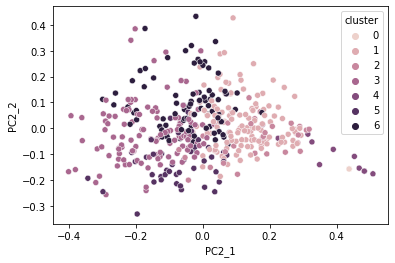

In [23]:
sns.scatterplot(x='PC2_1', y='PC2_2', hue='cluster', data=pca_2_df)

## Examine Clusters

In [29]:
list_a = [1,2,3,4]
list_b = [0.5, 0.4, 0.7, 0.1]

df_ab = pd.DataFrame(list(zip(list_a, list_b)), columns =['a', 'b'])

In [30]:
df_ab

,a,b
0,1,0.5
1,2,0.4
2,3,0.7
3,4,0.1


In [48]:
df_ab.sort_values(by='b', inplace=True, ascending=False)

In [49]:
df_ab.to_csv('test.csv', index=False)

In [50]:
df_read = pd.read_csv('test.csv')

In [51]:
df_read

,a,b
0,3,0.7
1,1,0.5
2,2,0.4
3,4,0.1


In [53]:
df_read.iloc[0,0]

3

In [7]:
def text_process(text):
        '''
        Takes in a string of text, then performs the following:
        1. Remove all punctuation
        2. Remove all stopwords
        3. Return the cleaned text as a list of words
        4. Remove words
        '''
        stemmer = WordNetLemmatizer()
        nopunc = [char for char in text if char not in string.punctuation]
        nopunc = ''.join([i for i in nopunc if not i.isdigit()])
        nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
        return [stemmer.lemmatize(word) for word in nopunc]
    
statement_list = list(df_statements.statement)
tfidfconvert = TfidfVectorizer(analyzer=text_process, ngram_range=(1,3)).fit(statement_list)
# tfidfconvert = TfidfVectorizer(tokenizer=process_text_alt,
#                              stop_words=stopwords.words('english'),
#                              max_df=0.5,
#                              min_df=0.1, 
#                              lowercase=True).fit(statement_list)
transformed_statements = tfidfconvert.transform(statement_list)

[08/27/22 22:58:15] WARNING  c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\sklear ]8;id=999345;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\warnings.py\warnings.py]8;;\:]8;id=755124;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\warnings.py#110\110]8;;\
                             n\feature_extraction\text.py:533: UserWarning: The parameter                          
                             'ngram_range' will not be used since 'analyzer' is callable'                          
                               "The parameter 'ngram_range' will not be used"                                      
                                                                                                                   

In [14]:
vocab = tfidfconvert.vocabulary_

In [52]:
df_vocab = pd.DataFrame(index=None, data = zip(tfidfconvert.vocabulary_.keys(), tfidfconvert.vocabulary_.values()),columns=['word', 'index']).sort_values('index')

In [53]:
df_vocab

,word,index
644,a,0
665,aaron,1
1171,abel,2
2413,abide,3
1735,able,4
...,...,...
2705,‘em,2767
2698,’,2768
496,“i,2769
404,“yes,2770
